In [ ]:
!pip install meteostat pandas


In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from meteostat import Point, Daily, Stations

In [ ]:
start = datetime(1990, 1, 1)
end   = datetime(2025, 8, 25)

In [ ]:
stations_hk = Stations().nearby(22.302, 114.174)   # 以座標搜尋周邊站台
stations_hk = Stations().nearby(22.302, 114.174).fetch(5)   # 以座標搜尋周邊站台
stations_hk

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
45005,Royal Observatory,HK,BL,45005,<NA>,22.3000,114.1667,32.0,Asia/Hong_Kong,NaT,NaT,1946-09-02,1992-06-30,1946-01-01,1992-01-01,783.244000
45004,King's Park,HK,BL,45004,<NA>,22.3167,114.1667,65.0,Asia/Hong_Kong,NaT,NaT,1992-08-01,2000-03-31,1992-01-01,2021-01-01,1798.819222
45007,Hong Kong Inter-National Airport,HK,BL,45007,VHHH,22.3333,114.1833,5.0,Asia/Hong_Kong,1948-12-31,2025-08-16,1973-11-23,2022-04-25,1985-01-01,2022-01-01,3609.483663
45001,Cheung Chau,HK,BL,45001,VHCH,22.2000,114.0167,79.0,Asia/Hong_Kong,1973-01-01,2002-05-13,NaT,NaT,NaT,NaT,19766.259040
59493,Shenzhen,CN,GD,59493,ZGSZ,22.5500,114.1000,18.0,Asia/Shanghai,1957-06-01,2025-08-16,1997-02-05,2022-04-25,2005-01-01,2022-01-01,28606.079049


In [ ]:
stations_hk.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 45005 to 59493
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           5 non-null      object        
 1   country        5 non-null      string        
 2   region         5 non-null      string        
 3   wmo            5 non-null      string        
 4   icao           3 non-null      string        
 5   latitude       5 non-null      float64       
 6   longitude      5 non-null      float64       
 7   elevation      5 non-null      float64       
 8   timezone       5 non-null      string        
 9   hourly_start   3 non-null      datetime64[ns]
 10  hourly_end     3 non-null      datetime64[ns]
 11  daily_start    4 non-null      datetime64[ns]
 12  daily_end      4 non-null      datetime64[ns]
 13  monthly_start  4 non-null      datetime64[ns]
 14  monthly_end    4 non-null      datetime64[ns]
 15  distance       5 non-nul

In [ ]:
sid = stations_hk.index[2]     # airport index[2]
print("Using station:", sid)

Using station: 45007


In [ ]:
df = Daily(sid, start, end).fetch() # 下載該測站的每日資料

In [ ]:
# if 'tavg' not in df or df['tavg'].isna().all():
df['tavg'] = (df['tmin'] + df['tmax']) / 2

In [ ]:
yearly = df['tavg'].resample('YE').mean().rename('tavg_c')
yearly.index = yearly.index.year

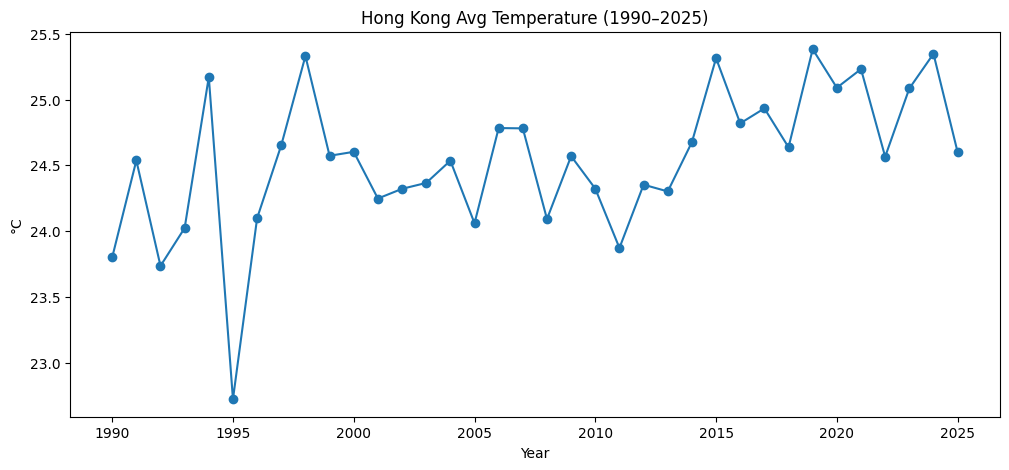

In [ ]:
ax = yearly.plot(figsize=(12,5), marker='o', title='Hong Kong Avg Temperature (1990–2025)')
ax.set_xlabel('Year'); ax.set_ylabel('°C')
plt.show()

API Data Analysis Project: Global Warming & Weather
Trends
Objective
You will use the Meteo API library to investigate global warming trends in Hong Kong and
one additional location of your choice. Your goal is to collect, analyze, and present
weather data visually and in a report.
Part 1: Hong Kong Analysis
Using yearly data from 1990 to 2025 answer:
1. Temperature Trends
a. Has the average temperature generally increased over time?
2. Seasonal Changes
a. Do the seasons look different compared to the past?
b. Is winter colder, warmer, or shorter than before?
3. Other Observations
a. Any unusual trends, changes in variability, or other patterns worth noting?

In [ ]:
df['month'] = df.index.month

In [ ]:
# 計算冬季平均氣溫
winter_df = df[df['month'].isin([12, 1, 2])]
winter_avg_90s = winter_df[(winter_df.index.year >= 1990) & (winter_df.index.year <= 1999)]['tavg'].mean()
winter_avg_20s = winter_df[(winter_df.index.year >= 2015) & (winter_df.index.year <= 2024)]['tavg'].mean()
# 計算夏季平均氣溫
summer_df = df[df['month'].isin([6, 7, 8])]
summer_avg_90s = summer_df[(summer_df.index.year >= 1990) & (summer_df.index.year <= 1999)]['tavg'].mean()
summer_avg_20s = summer_df[(summer_df.index.year >= 2015) & (summer_df.index.year <= 2024)]['tavg'].mean()

print(f"1990年代冬季平均氣溫: {winter_avg_90s:.2f}°C")
print(f"2015-2024年冬季平均氣溫: {winter_avg_20s:.2f}°C")
print("\n")
print(f"1990年代夏季平均氣溫: {summer_avg_90s:.2f}°C")
print(f"2015-2024年夏季平均氣溫: {summer_avg_20s:.2f}°C")

1990年代冬季平均氣溫: 17.88°C
2015-2024年冬季平均氣溫: 18.34°C


1990年代夏季平均氣溫: 29.31°C
2015-2024年夏季平均氣溫: 30.16°C


            1990s  2000-2024
season                      
Autumn  26.193522  26.468715
Spring  23.341312  24.325519
Summer  29.308099  29.906808
Winter  17.882243  17.843192


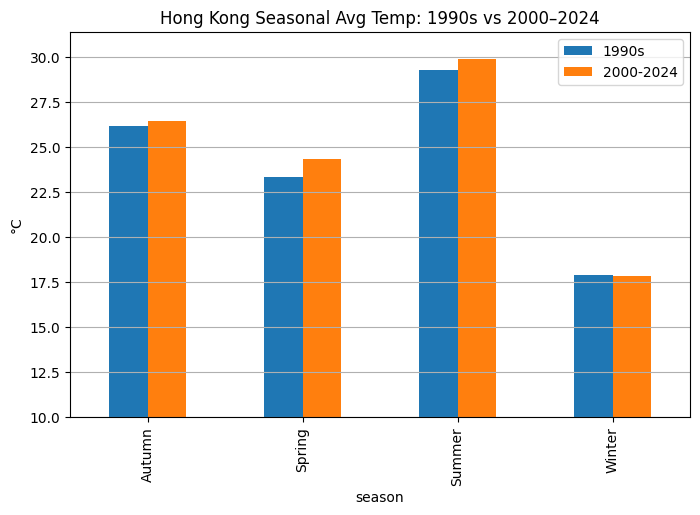

In [ ]:
# --- 定義季節 先建立季節欄位
def get_season(month):
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Autumn"
    else:
        return "Winter"

df['season'] = df['month'].apply(get_season)
season_order = ["Spring", "Summer", "Autumn", "Winter"]


# 計算各季節平均
season_90s = df[(df['year']>=1990)&(df['year']<=1999)].groupby('season')['tavg'].mean()
season_20s = df[(df['year']>=2000)&(df['year']<=2024)].groupby('season')['tavg'].mean()

# 合併成 DataFrame
compare_season = pd.concat([season_90s, season_20s], axis=1)
compare_season.columns = ['1990s','2000-2024']

print(compare_season)

#比對
compare_season.plot(kind='bar', figsize=(8,5))
plt.title("Hong Kong Seasonal Avg Temp: 1990s vs 2000–2024")
plt.ylabel("°C")
plt.grid(axis='y')
plt.ylim(10, None)
plt.show()


1990年代平均氣溫標準差: 5.03
2015-2024年平均氣溫標準差: 5.28


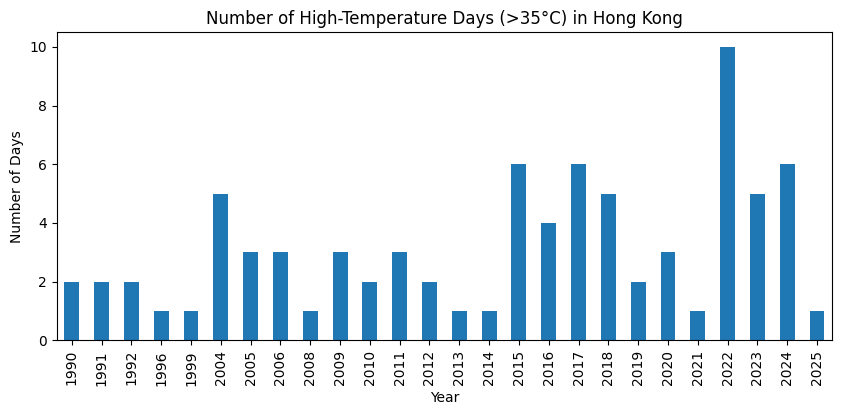

In [ ]:
df['year'] = df.index.year
# 計算每年的氣溫標準差
yearly_std = df.groupby('year')['tavg'].std()
std_90s = yearly_std[(yearly_std.index >= 1990) & (yearly_std.index <= 1999)].mean()
std_20s = yearly_std[(yearly_std.index >= 2015) & (yearly_std.index <= 2024)].mean()

print(f"1990年代平均氣溫標準差: {std_90s:.2f}")
print(f"2015-2024年平均氣溫標準差: {std_20s:.2f}")

# 計算每年高溫日 (tmax > 35°C) 的數量
df_hot_days = df[df['tmax'] > 35]
hot_days_count = df_hot_days.groupby(df_hot_days.index.year).size()

# 繪製高溫日數量的趨勢圖
plt.figure(figsize=(10, 4))
hot_days_count.plot(kind='bar', title='Number of High-Temperature Days (>35°C) in Hong Kong')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.show()

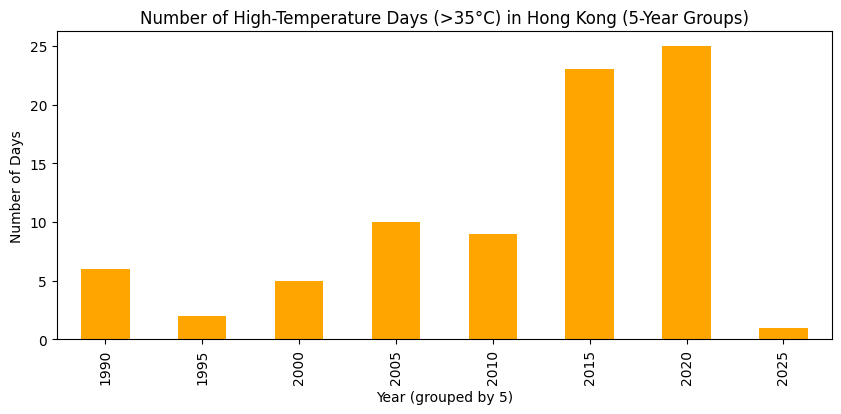

In [ ]:
# 改成每 5 年一組
hot_days_5y = hot_days_count.groupby((hot_days_count.index // 5) * 5).sum()
# ((year // 5) * 5) 會把年份映射到 1990, 1995, 2000... 等等

plt.figure(figsize=(10,4))
hot_days_5y.plot(kind='bar', color='orange', title='Number of High-Temperature Days (>35°C) in Hong Kong (5-Year Groups)')
plt.xlabel('Year (grouped by 5)')
plt.ylabel('Number of Days')
plt.show()


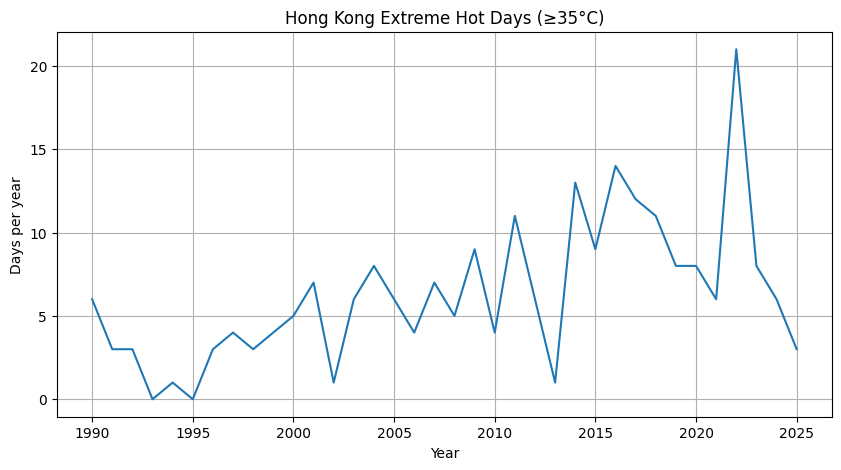

In [ ]:
hot_days = (df['tmax'] >= 35).resample('YE').sum().rename('HotDays(≥35°C)')
hot_days.index = hot_days.index.year

plt.figure(figsize=(10,5))
sns.lineplot(data=hot_days)
plt.title("Hong Kong Extreme Hot Days (≥35°C)")
plt.xlabel("Year")
plt.ylabel("Days per year")
plt.grid(True)
plt.show()

#SEATTLE

In [ ]:
stations_sea = Stations().nearby(47.6062, -122.3321)    # 以座標搜尋周邊站台
stations_sea = Stations().nearby(47.6062, -122.3321).fetch(3)   # 以座標搜尋周邊站台
stations_sea

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
KBFI0,Seattle / South Park,US,WA,<NA>,KBFI,47.5300,-122.3020,6.0,America/Los_Angeles,1943-10-01,2025-08-16,1943-10-02,2022-04-24,1944-01-01,2022-01-01,8768.825206
KRNT0,Renton,US,WA,<NA>,KRNT,47.4931,-122.2157,10.0,America/Los_Angeles,2006-01-01,2025-08-16,2006-01-01,2022-04-24,2006-01-01,2021-01-01,15312.615138
72793,Seattle-Tacoma Airport,US,WA,72793,KSEA,47.4500,-122.3167,131.0,America/Los_Angeles,1948-01-01,2025-08-16,1948-01-01,2025-08-19,1948-01-01,2022-01-01,17407.092143


In [ ]:
sea_id = stations_sea.index[2]     # 機場 index[2]
print("Using station:", sea_id)
df_sea = Daily(sea_id, start, end).fetch() # 下載該測站的每日資料

Using station: 72793


In [ ]:
if 'tavg' not in df_sea or df_sea['tavg'].isna().all():
    df_sea['tavg'] = (df_sea['tmin'] + df_sea['tmax']) / 2

yearly = df_sea['tavg'].resample('YE').mean().rename('tavg_c')
yearly.index = yearly.index.year

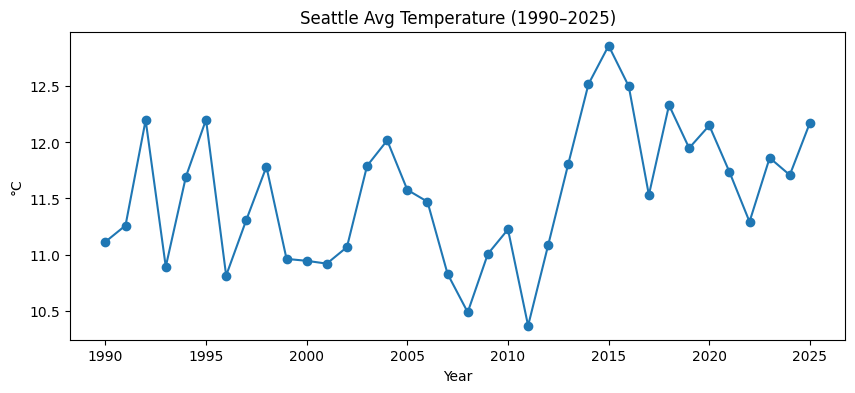

In [ ]:
ax = yearly.plot(figsize=(10,4), marker='o', title='Seattle Avg Temperature (1990–2025)')
ax.set_xlabel('Year'); ax.set_ylabel('°C')
plt.show()